# Berlin Trees Visualizations

## Notebook Setup
1. Importing relevant libraries
2. Importing the Dataset
3. inspect data
4. Checking Data types

In [20]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp


In [22]:
pip install plotly==5.8.2


     |████████████████████████████████| 15.2 MB 4.1 MB/s eta 0:00:01     |██████████████████████████▎     | 12.5 MB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import plotly.express as px

In [8]:
df = pd.read_csv('berlin_trees_data.csv')

/Users/anna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

df.head()

,Unnamed: 0,ID,Baum Nr.,Objektnr.,Objektname,Baumart deutsch,Baumart botanisch,Gattung botanisch,Straße,Hausnr.,Hausnr. Zusatz,Pflanzjahr,Standalter,Krone Durchmesser in m,Stamm Umfang in cm,Baumhöhe in m,Bezirk
0,0,00008100:000c1b36,16,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1936,86,11.0,189.0,17.0,Charlottenburg-Wilmersdorf
1,1,00008100:000c1b35,17,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,19,0,1926,96,12.0,185.0,25.0,Charlottenburg-Wilmersdorf
2,2,00008100:000c1b32,20,5,Abbestraße,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Abbestraße,14-20,0,1980,42,8.0,135.0,12.0,Charlottenburg-Wilmersdorf
3,3,00008100:000c1aa3,24,241,Am Rupenhorn,Gemeine Rosskastanie,Aesculus hippocastanum,AESCULUS,Am Rupenhorn,3b,0,1975,47,8.0,215.0,17.0,Charlottenburg-Wilmersdorf
4,4,00008100:000c196a,33,348,Arysallee,Amerikanische Rot-Eiche,Quercus rubra,QUERCUS,Arysallee,11,0,1980,42,13.0,176.0,17.0,Charlottenburg-Wilmersdorf


In [11]:
df.dtypes

Unnamed: 0                  int64
ID                         object
Baum Nr.                   object
Objektnr.                  object
Objektname                 object
Baumart deutsch            object
Baumart botanisch          object
Gattung botanisch          object
Straße                     object
Hausnr.                    object
Hausnr. Zusatz             object
Pflanzjahr                  int64
Standalter                  int64
Krone Durchmesser in m    float64
Stamm Umfang in cm        float64
Baumhöhe in m             float64
Bezirk                     object
dtype: object

In [53]:
print(df.columns)


Index(['Unnamed: 0', 'ID', 'Baum Nr.', 'Objektnr.', 'Objektname',
       'Baumart deutsch', 'Baumart botanisch', 'Gattung botanisch', 'Straße',
       'Hausnr.', 'Hausnr. Zusatz', 'Pflanzjahr', 'Standalter',
       'Krone Durchmesser in m', 'Stamm Umfang in cm', 'Baumhöhe in m',
       'Bezirk'],
      dtype='object')


# Top 10 Trees per District Visuallization
1. Check for Districts
2. Group by District
3. Make groups
4. Filter for top 10 trees

In [48]:
print(df['Bezirk'].unique())

['Charlottenburg-Wilmersdorf' 'Friedrichshain-Kreuzberg' 'Lichtenberg'
 'Marzahn-Hellersdorf' 'Neukölln' 'Pankow' 'Reinickendorf' 'Spandau'
 'Steglitz-Zehlendorf' 'Tempelhof-Schöneberg' 'Treptow-Köpenick']


In [49]:
### Splitting Groups per district

df_district = df.groupby(['Bezirk'])

## Charlottenburg-Wilmersdorf

In [40]:
### Defining groups
df_charlottenburg = df_district.get_group('Charlottenburg-Wilmersdorf')

In [50]:
### Filter out top 10 District trees

df_trees_in_charlottenburg = df_charlottenburg['Baumart deutsch'].value_counts()

In [51]:
type(df_trees_in_charlottenburg)


pandas.core.series.Series

<AxesSubplot:title={'center':'Top Ten Trees in Charlottenburg-Wilmersdorf'}>

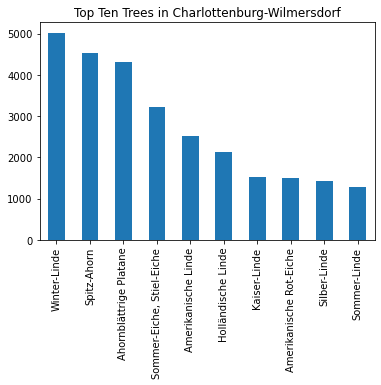

In [52]:
df_trees_in_charlottenburg.head(10).plot.bar(title="Top Ten Trees in Charlottenburg-Wilmersdorf")

# Top 10 Strees with most trees per District Visualization


## Streets with most trees in Charlottenburg

In [54]:
df_streets_in_charlottenburg = df_charlottenburg['Straße'].value_counts()

<AxesSubplot:title={'center':'Streets with most Trees in Charlottenburg-Wilmersdorf'}>

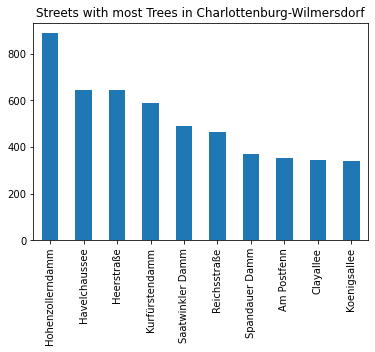

In [55]:
df_streets_in_charlottenburg.head(10).plot.bar(title="Streets with most Trees in Charlottenburg-Wilmersdorf")

## Top Trees in Carlottenburg
1. oldest
2. highest

In [58]:
df_charlottenburg['Baumhöhe in m'].idxmax

<bound method Series.idxmax of 0        17.0
1        25.0
2        12.0
3        17.0
4        17.0
         ... 
42174     3.0
42175     3.0
42176     3.0
42177     3.0
42178     3.0
Name: Baumhöhe in m, Length: 42179, dtype: float64>

In [63]:
### Heighest Tree
max_height_in_charlottenburg = df_charlottenburg['Baumhöhe in m'].idxmax()
heighest_tree_in_charlottenburg = df_charlottenburg.iloc[[max_height_in_charlottenburg]]
print(heighest_tree_in_charlottenburg)

      Unnamed: 0                 ID Baum Nr. Objektnr.  Objektname  \
2183        2183  00008100:000c3f69      168      1885  Heerstraße   

                Baumart deutsch Baumart botanisch Gattung botanisch  \
2183  Sommer-Eiche, Stiel-Eiche     Quercus robur           QUERCUS   

          Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
2183  Heerstraße     134              0        1965          57   

      Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  \
2183                    22.0               320.0           30.0   

                          Bezirk  
2183  Charlottenburg-Wilmersdorf  


In [64]:
### Oldest Tree
max_age_in_charlottenburg = df_charlottenburg['Standalter'].idxmax()
oldest_tree_in_charlottenburg = df_charlottenburg.iloc[[max_age_in_charlottenburg]]
print(oldest_tree_in_charlottenburg)

      Unnamed: 0                 ID Baum Nr. Objektnr.     Objektname  \
8021        8021  00008100:000d2515      608      1865  Havelchaussee   

                Baumart deutsch Baumart botanisch Gattung botanisch  \
8021  Sommer-Eiche, Stiel-Eiche     Quercus robur           QUERCUS   

             Straße Hausnr. Hausnr. Zusatz  Pflanzjahr  Standalter  \
8021  Havelchaussee       0              0        1855         167   

      Krone Durchmesser in m  Stamm Umfang in cm  Baumhöhe in m  \
8021                     NaN               370.0           25.0   

                          Bezirk  
8021  Charlottenburg-Wilmersdorf  
